In [188]:
#import some required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [195]:
#loading the dataset
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [198]:
dups = df.pivot_table(columns=['aspiration'], aggfunc='size')
print (dups)

aspiration
std      168
turbo     37
dtype: int64


In [4]:
#checking the dataset
shape=df.shape
print("Dataset contains {} rows and {} columns".format(shape[0],shape[1]))

Dataset contains 205 rows and 26 columns


In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
#dataset description
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [192]:
#encoding the needed categorical columns to numerical data for precise model accuracy
Ini_Num_df = df[['symboling', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]
#Ini_Num_df
first = df[['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']]
first = first.apply(lambda x: pd.factorize(x)[0])

Final_df = pd.concat([Ini_Num_df, first], axis=1)
Final_df.reindex(columns=['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'])
Final_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,price,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,...,13276.710571,0.097561,0.180488,0.560976,1.80000,0.673171,0.014634,2.156098,0.502439,1.478049
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,...,7988.852332,0.297446,0.385535,0.497483,0.83666,0.556171,0.120377,1.073305,1.254890,2.184113
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,...,5118.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,...,7788.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,...,10295.000000,0.000000,0.000000,1.000000,2.00000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,...,16503.000000,0.000000,0.000000,1.000000,2.00000,1.000000,0.000000,2.000000,0.000000,1.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,...,45400.000000,1.000000,1.000000,1.000000,4.00000,2.000000,1.000000,6.000000,6.000000,7.000000


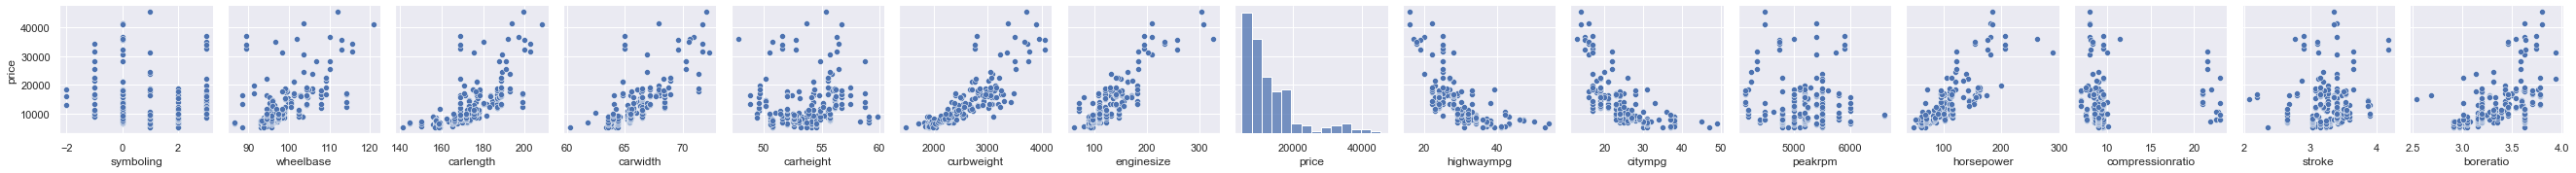

In [169]:
#to check the relationships between the dependent and independent variables
sns.pairplot(
    Final_df,
    x_vars=['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'price', 'highwaympg', 'citympg', 'peakrpm', 'horsepower', 'compressionratio', 'stroke', 'boreratio'],
    y_vars=['price'],
)

<AxesSubplot:>

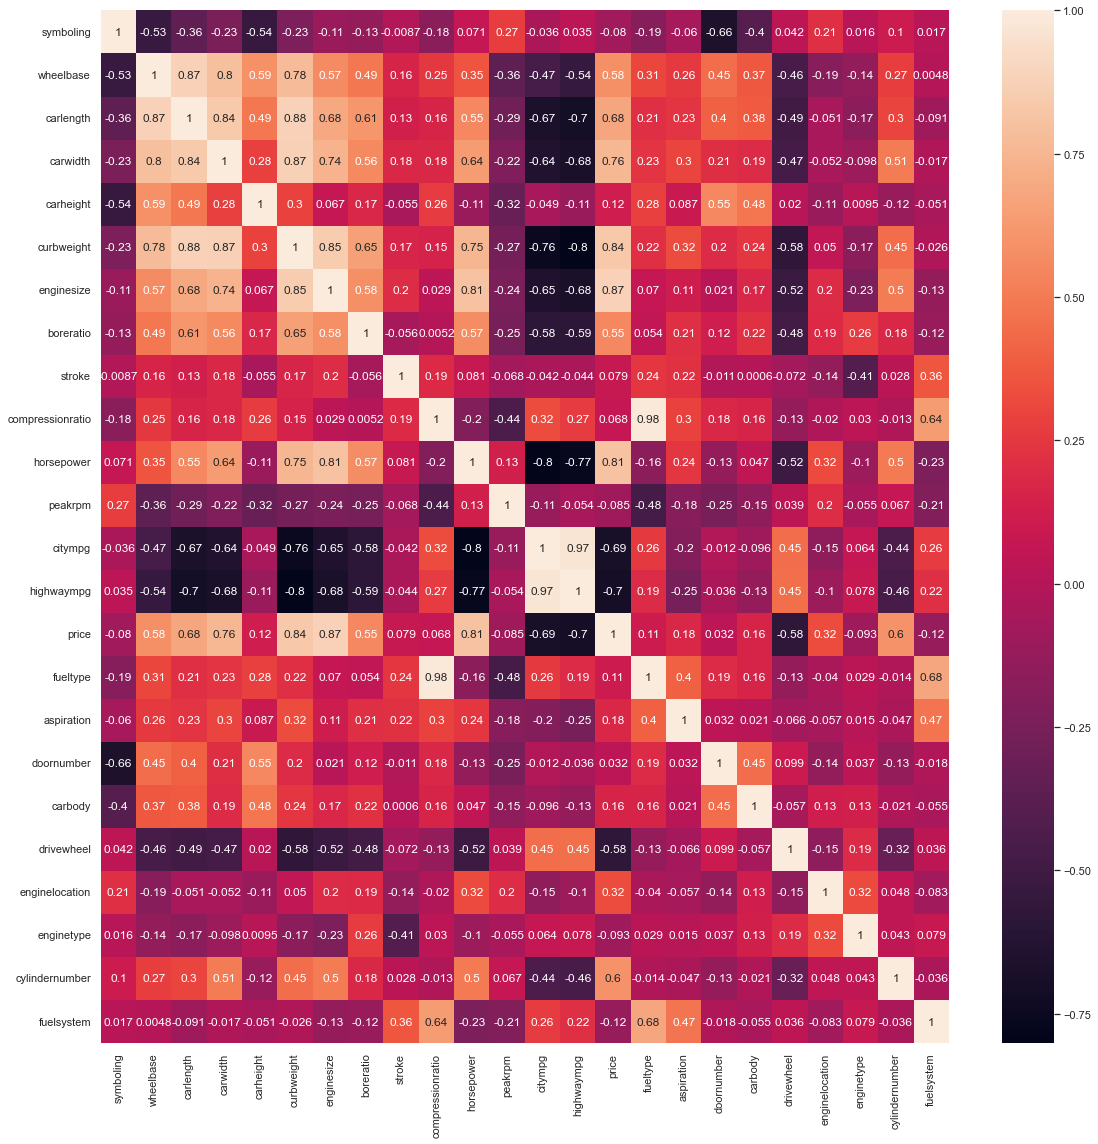

In [170]:
#seaborn correlation heatmap
plt.figure(figsize = (19,19))
sns.heatmap(Final_df.corr(), annot=True)

In [172]:
#splitting required columns in test and train dataset
x = Final_df.loc[:, ['fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = Final_df['price']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [173]:
#checking out the splitted datasets
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (164, 22)
X_test: (41, 22)
Y_train: (164,)
Y_test: (41,)


In [174]:
#fitting training datasets in the Linear Regression model
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [176]:
#to print an array of preditions
y_pred=linreg.predict(x_test)
y_pred

array([ 7075.16309879, 15689.35183413, 12799.79242961, 20168.52113771,
       12343.54510871, 34028.        ,  4099.70899005, 10523.00994897,
       10640.67668355, 10355.84176147,  6558.63608412,  9660.49000637,
        9992.02518304, 15554.13140228,  7029.39548884,  6392.00695295,
       12750.57626947, 12828.92632944,  6764.83566469, 13687.27693229,
       15932.1813388 , 36615.31241156,  6492.34028234, 20100.20610061,
        8452.3257937 , 17365.86041504, 12184.80769095, 16753.82746198,
       10007.08580029,  6546.67545445,  9465.18196607, 12417.38442814,
       21980.71893607,  7248.18040978, 11391.53623402, 16234.48859937,
       35484.6461804 ,  6741.87027956, 17589.18616337,  4992.98570319,
       25799.42604276])

In [177]:
#to check the accuracy of the model
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 89.64


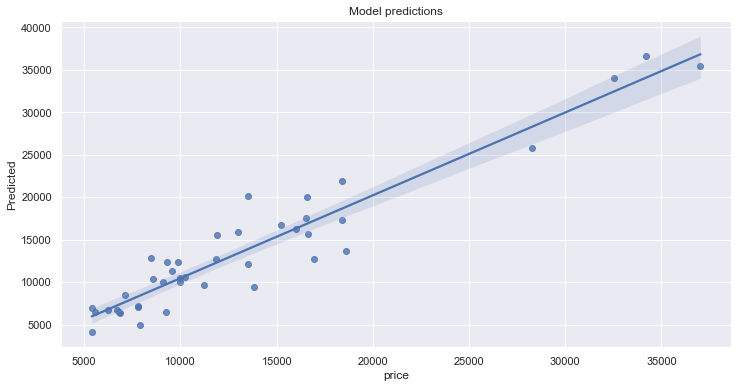

In [190]:
#visualizing the model working
plt.figure(figsize = (12,6))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model predictions')
sns.regplot(x=y_test,y=y_pred);


In [145]:
#plt.scatter(y_test, y_pred)

In [179]:
#Ordinary Least Squares regression 
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     53.55
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           2.00e-57
Time:                        06:23:27   Log-Likelihood:                -1524.4
No. Observations:                 164   AIC:                             3095.
Df Residuals:                     141   BIC:                             3166.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -3.91e+04   1.64e+04  

Feature: 0, Score: 10455.24175
Feature: 1, Score: 1935.38988
Feature: 2, Score: 228.91396
Feature: 3, Score: -464.29301
Feature: 4, Score: -1389.36800
Feature: 5, Score: 12547.78538
Feature: 6, Score: 48.18294
Feature: 7, Score: 9.76886
Feature: 8, Score: 326.18921
Feature: 9, Score: 177.88836
Feature: 10, Score: 2.39396
Feature: 11, Score: 157.45191
Feature: 12, Score: 1223.57698
Feature: 13, Score: 109.47456
Feature: 14, Score: -345.50203
Feature: 15, Score: -1595.48031
Feature: 16, Score: -1880.32496
Feature: 17, Score: -612.12909
Feature: 18, Score: -7.43086
Feature: 19, Score: 2.18491
Feature: 20, Score: -196.46147
Feature: 21, Score: 235.62828


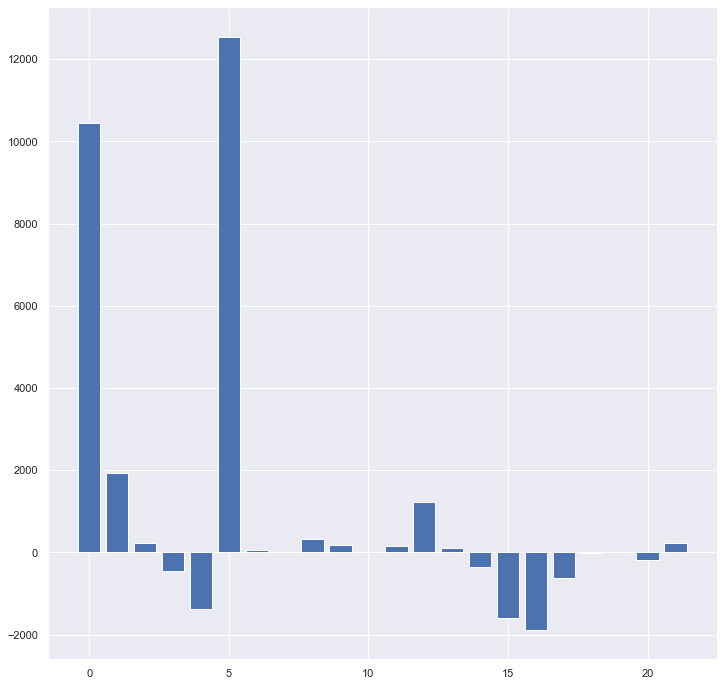

<Figure size 1080x576 with 0 Axes>

In [180]:
linreg.fit(x, y)
# get importance
importance = linreg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.figure(figsize = (15,8))
plt.show()

In [181]:
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 1933.5306979763654
MSE 6016028.895264273
RMSE 2452.7594450463894


<Figure size 1080x576 with 0 Axes>

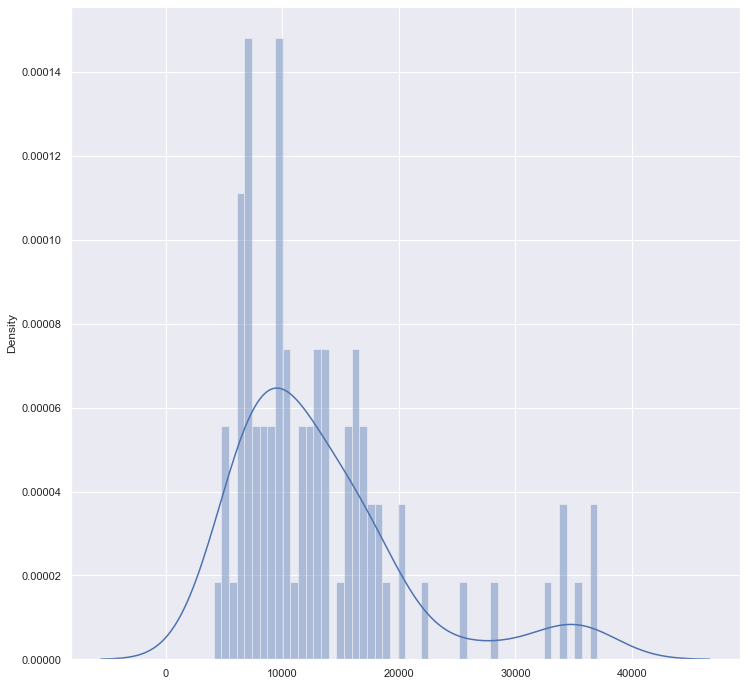

<Figure size 1080x576 with 0 Axes>

In [182]:
sns.distplot((y_test, y_pred), bins=50)
plt.figure(figsize = (15,8))

In [183]:
#to retrieve 3 most import features for positive influence on car prices
pd.DataFrame(linreg.coef_, x.columns, columns=['Coeff']).nlargest(n=3, columns=['Coeff'])

,Coeff
enginelocation,12547.785380
fueltype,10455.241750
aspiration,1935.389882
